In [14]:
import env
import agent
import numpy as np
import matplotlib.pyplot as plt

Env = env.Grid_1()
agent_1 = agent.ValueIteration(Env)
agent_2 = agent.PolicyIteration(Env)
agent_3 = agent.ConfusedAgent(Env)

In [15]:
def plot(Env,policy,V):
	pp = np.reshape(np.argmax(policy, axis=1), Env.shape)
	print(pp)

	plt.matshow(np.reshape(V, Env.shape))
	# plt.arrow(0,0.5,0,-0.7,head_width = 0.1)



	for i in range(Env.shape[0]):
		for j in range(Env.shape[1]):
			if i == (Env.shape[0]-1) and j == (Env.shape[1]-1):
				continue
			if pp[i][j] == 0:
				plt.arrow(j,i+0.5,0,-0.7,head_width = 0.1)
			elif pp[i][j] == 2:
				plt.arrow(j,i-0.5,0,+0.7,head_width = 0.1)
			elif pp[i][j] == 1:
				plt.arrow(j-0.5,i,0.7,0,head_width = 0.1)
			elif pp[i][j] == 3:
				plt.arrow(j+0.5,i,-0.7,0,head_width = 0.1)

	plt.show()

## Value-Iteration

83
[[-5.53837822 -4.59272034 -3.9767854  -3.37568177 -3.333408   -2.70976524
  -2.95743713 -2.91899028]
 [-5.48762664 -4.81546311 -4.49054929 -3.67453104 -2.70976524 -2.4745644
  -2.32040808 -2.14698728]
 [-5.41811134 -4.51357149 -4.08194176 -3.33202251 -2.4745644  -2.32040808
  -2.14698728 -1.97455113]
 [-4.46991549 -3.81067726 -3.3299544  -2.77577287 -2.56843416 -2.38209836
  -1.97455113 -1.65842545]
 [-3.81067726 -3.07459897 -2.77577287 -2.72618593 -2.51302741 -2.30513814
  -1.65666059 -1.22454338]
 [-3.07459897 -2.87285709 -2.72618593 -2.51302741 -2.4587909  -1.65666059
  -1.22454338 -0.85176327]
 [-3.21344967 -3.07459897 -2.87285709 -2.11167898 -1.87681314 -1.37040799
  -0.71989879  0.        ]
 [-3.58562649 -2.98463641 -2.11167898 -1.87681314 -1.44708204 -0.71989879
   0.          0.        ]]
[[1 1 1 1 1 2 2 2]
 [1 1 1 1 1 2 2 2]
 [2 2 1 1 1 1 1 2]
 [2 2 2 2 1 1 1 2]
 [1 2 1 2 2 1 2 2]
 [1 1 1 1 1 1 1 2]
 [1 0 0 2 2 1 2 2]
 [0 1 1 1 1 1 1 0]]


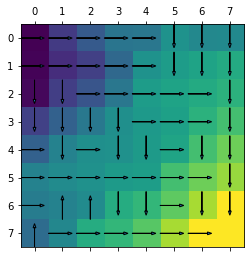

In [23]:
### Value Iteration
# agent_1.set_gamma(0.5)
agent_1.clear()
itr = 0
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
    itr += 1
    
print(itr)
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)
# agent_1.clear()

## Policy-Iteration

[[-5.53837822 -4.59272034 -3.9767854  -3.37568177 -3.333408   -2.70976524
  -2.95743713 -2.91899028]
 [-5.48762664 -4.81546311 -4.49054929 -3.67453104 -2.70976524 -2.4745644
  -2.32040808 -2.14698728]
 [-5.41811134 -4.51357149 -4.08194176 -3.33202251 -2.4745644  -2.32040808
  -2.14698728 -1.97455113]
 [-4.46991549 -3.81067726 -3.3299544  -2.77577287 -2.56843416 -2.38209836
  -1.97455113 -1.65842545]
 [-3.81067726 -3.07459897 -2.77577287 -2.72618593 -2.51302741 -2.30513814
  -1.65666059 -1.22454338]
 [-3.07459897 -2.87285709 -2.72618593 -2.51302741 -2.4587909  -1.65666059
  -1.22454338 -0.85176327]
 [-3.21344967 -3.07459897 -2.87285709 -2.11167898 -1.87681314 -1.37040799
  -0.71989879  0.        ]
 [-3.58562649 -2.98463641 -2.11167898 -1.87681314 -1.44708204 -0.71989879
   0.          0.        ]]
[[1 1 1 1 1 2 2 2]
 [1 1 1 1 1 2 2 2]
 [2 2 1 1 1 1 1 2]
 [2 2 2 2 1 1 1 2]
 [1 2 1 2 2 1 2 2]
 [1 1 1 1 1 1 1 2]
 [1 0 0 2 2 1 2 2]
 [0 1 1 1 1 1 1 0]]


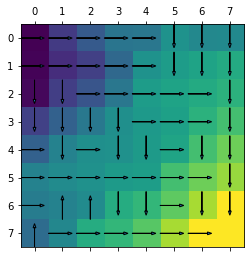

In [40]:
### Policy Iteration
# agent_2.set_gamma(0.5)
agent_2.clear()
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)
# agent_2.clear()

[[-0.13263486 -0.94565787 -1.89131574 -0.60110363 -0.62364276 -0.19788294
  -0.7744477  -0.97233064]
 [-0.39331117 -0.93348487 -0.69101195 -1.20220727 -0.23520083 -0.15415632
  -0.38935716 -0.17243615]
 [-0.94819586 -0.70289423 -1.6363791  -2.01822552 -0.15415632 -0.38935716
  -1.0263862  -0.94443915]
 [-0.94819586 -0.7360783  -1.43897252 -2.76814477 -0.64512693 -1.3472194
  -0.31612568 -0.43388207]
 [-0.89141836 -0.55418153 -1.29025982 -0.21315851 -1.3472194  -1.99234633
  -2.90910287 -0.75000775]
 [-0.89141836 -1.29025982 -1.4920017  -0.99841255 -0.5952465  -0.64948302
  -0.65050919 -1.08262641]
 [-0.37217683 -0.74435365 -0.88320435 -0.5952465  -0.61558925 -1.21083576
  -0.85176327 -0.85176327]
 [-0.11897968 -0.95089784 -0.87295743 -1.74591486 -1.9807807  -0.72718325
  -1.50227247  0.        ]]
[[3 0 3 0 1 1 1 3]
 [3 2 2 0 1 2 3 2]
 [2 2 3 0 1 0 0 0]
 [3 2 3 0 2 3 1 2]
 [2 1 3 2 0 3 3 0]
 [3 0 3 2 2 3 2 3]
 [3 3 3 1 1 3 1 1]
 [3 2 2 3 3 2 0 2]]


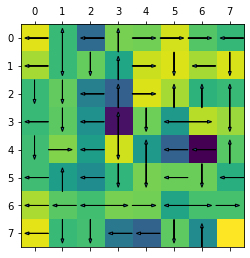

In [18]:
agent_3.get_policy()
print(np.reshape(agent_3.V,Env.shape))
plot(Env,agent_3.policy,agent_3.V)

# Part-c

In [19]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

[ 0.         -0.23343897 -0.40911703 -0.54677765 -0.67078989 -0.78976774
 -0.8980496  -1.00458107 -1.10029206 -1.18386136 -1.26178186 -1.33320086
 -1.4103369  -1.47608716 -1.54662689 -1.60883369 -1.67441328 -1.73186313
 -1.79465997 -1.85037207 -1.90610591 -1.95433209 -2.00073108 -2.03979589
 -2.07241174 -2.09737551 -2.11953746 -2.14108982 -2.16079872 -2.18049203
 -2.20003639 -2.21624718 -2.23209985 -2.24795251 -2.26380517 -2.27965783
 -2.29510525 -2.30961061 -2.32284122 -2.33480566 -2.34669515 -2.35858465
 -2.37047415 -2.38236365 -2.39425314 -2.40600007 -2.41722904 -2.42845801
 -2.43922304 -2.44979148 -2.46035992 -2.47092836 -2.48124331 -2.49115122
 -2.50105913 -2.51096705 -2.52087496 -2.53025887 -2.53950625 -2.54835361
 -2.55694047 -2.56552733 -2.57411419 -2.58270105 -2.59068306 -2.59742096
 -2.60402624 -2.61063152 -2.61723679 -2.62384207 -2.63044735 -2.63705262
 -2.64331949 -2.64926424 -2.65501277 -2.66029699 -2.66558122 -2.67086544
 -2.67614966 -2.6813367  -2.68549066 -2.68832357 -2

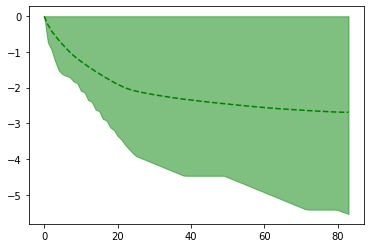

In [20]:
agent_1.clear()

mu = []
low = []
high = []

while True:
    agent_1.reset()
    agent_1.update()
    
    mu.append((np.matrix(np.reshape(agent_1.V,Env.shape))).mean())
    low.append((np.matrix(np.reshape(agent_1.V,Env.shape))).min())
    high.append((np.matrix(np.reshape(agent_1.V,Env.shape))).max())
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
mu = np.array(mu)
high = np.array(high)
low = np.array(low)

print(mu)
plot_mean_and_CI(mu, high, low, color_mean='g--', color_shading='g')





[-159.66094347   -3.33346777   -2.93105098   -2.7360918    -2.70036303
   -2.69518804   -2.69039877]


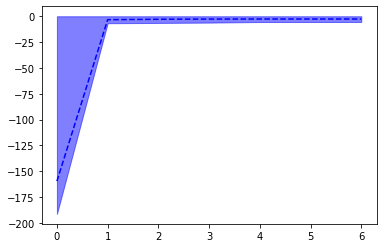

In [21]:
agent_2.clear()
mu = []
low = []
high = []

while True:
    V = agent_2.evaluate_policy()
    
    mu.append((np.matrix(np.reshape(V,Env.shape))).mean())
    low.append((np.matrix(np.reshape(V,Env.shape))).min())
    high.append((np.matrix(np.reshape(V,Env.shape))).max())
    
    stable = agent_2.update()
    
    if stable == True:
        break
        
mu = np.array(mu)
high = np.array(high)
low = np.array(low)

print(mu)
plot_mean_and_CI(mu, high, low, color_mean='b--', color_shading='b')

[ -0.6264676   -1.69452954  -2.67653347  -3.95246017  -4.56831221
  -5.32602939  -6.15255949  -6.66660417  -6.77594087  -8.01353214
  -9.01892072  -9.87501055 -10.9133723  -11.60524393 -12.24677278
 -13.64262504 -13.7427512  -14.04692881 -16.13842424 -15.88754752
 -16.78886506 -17.5640254  -19.14870427 -20.81754666 -22.21488738
 -22.71075802 -24.24934846 -25.06719907 -25.49045463 -25.86020997
 -23.98420925 -23.81493891 -25.10106181 -26.57147029 -27.40377257
 -26.4112766  -28.42917481 -28.38786475 -33.56365574 -30.73361152
 -32.11041111 -30.05974581 -32.43405678 -31.70489832 -31.00126922
 -29.64016029 -25.01849949 -28.19642151 -28.43537768 -27.2403934
 -29.59444407 -35.81994311 -41.78443747 -41.20587555 -44.65591005
 -48.44985533 -48.87410031 -49.89656294 -49.43440922 -51.19362201
 -54.44726825 -61.31850536 -60.04550441 -59.00400985 -59.05148803
 -60.68131443 -63.24602725 -65.83278991 -67.52740041 -70.43927756
 -70.13799334 -69.85130719 -70.64641623 -69.59438961 -72.2265406
 -74.5018543

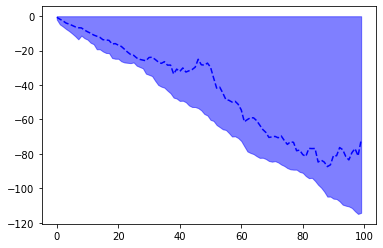

In [22]:
agent_3.clear()
mu = []
low = []
high = []

for i in range(100):
    agent_3.get_policy()
    
    mu.append((np.matrix(np.reshape(agent_3.V,Env.shape))).mean())
    low.append((np.matrix(np.reshape(agent_3.V,Env.shape))).min())
    high.append((np.matrix(np.reshape(agent_3.V,Env.shape))).max())
        
mu = np.array(mu)
high = np.array(high)
low = np.array(low)

print(mu)
plot_mean_and_CI(mu, high, low, color_mean='b--', color_shading='b')

## Comparison of different policies with different values of $\gamma$

### Value Iteration

### $\gamma = 0$

[[-0.13263486 -0.13263486 -0.32491382 -0.04227377 -0.04227377 -0.04227377
  -0.19788294 -0.19788294]
 [-0.13263486 -0.32491382 -0.61593495 -0.32491382 -0.04227377 -0.15415632
  -0.1734208  -0.17243615]
 [-0.39331117 -0.50493138 -0.32491382 -0.66336892 -0.15415632 -0.1734208
  -0.15415632 -0.17243615]
 [-0.50493138 -0.7360783  -0.55418153 -0.04958694 -0.18633581 -0.15415632
  -0.1734208  -0.17243615]
 [-0.65923822 -0.20174187 -0.04958694 -0.21315851 -0.04958694 -0.18633581
  -0.40754722 -0.31612568]
 [-0.20174187 -0.1388507  -0.20174187 -0.04958694 -0.21315851 -0.05423651
  -0.37278011 -0.37278011]
 [-0.11897968 -0.20174187 -0.1388507  -0.21315851 -0.05423651 -0.5952465
  -0.43211721  0.        ]
 [-0.11897968 -0.11897968 -0.23486584 -0.23486584 -0.23486584 -0.42973111
   0.          0.        ]]
[[0 3 2 1 0 3 0 3]
 [0 1 0 3 0 2 2 2]
 [0 3 0 2 1 1 3 1]
 [0 2 2 2 1 0 0 0]
 [3 2 1 2 3 0 0 0]
 [1 2 3 0 3 3 1 1]
 [2 0 3 0 0 3 0 2]
 [2 3 1 2 3 3 1 0]]


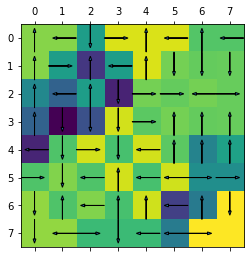

In [32]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 0.1$

[[-0.14737059 -0.14737059 -0.39040487 -0.04697038 -0.04697038 -0.04697038
  -0.21986774 -0.21986774]
 [-0.14737059 -0.39040487 -0.65497218 -0.39040487 -0.04697038 -0.1732288
  -0.19074213 -0.19150863]
 [-0.40804691 -0.54573474 -0.39040487 -0.67053011 -0.1732288  -0.19074213
  -0.1732288  -0.19074213]
 [-0.54573474 -0.75785662 -0.56134271 -0.07161678 -0.20365715 -0.1732288
  -0.19074213 -0.19150863]
 [-0.73247959 -0.21780339 -0.07161678 -0.22031969 -0.07161678 -0.20365715
  -0.4266197  -0.335275  ]
 [-0.21780339 -0.16062902 -0.21780339 -0.07161678 -0.22031969 -0.07626635
  -0.41419598 -0.41419598]
 [-0.13219832 -0.21780339 -0.16062902 -0.22031969 -0.07626635 -0.60287264
  -0.47353308  0.        ]
 [-0.13219832 -0.13219832 -0.26095944 -0.26095944 -0.26095944 -0.4558247
   0.          0.        ]]
[[0 3 2 1 0 3 0 3]
 [0 1 0 3 0 2 2 2]
 [0 3 0 2 1 1 3 3]
 [0 2 2 2 1 0 0 0]
 [3 2 1 2 3 0 0 0]
 [1 2 3 0 3 3 1 1]
 [2 0 3 0 0 3 0 2]
 [2 3 1 2 3 3 1 0]]


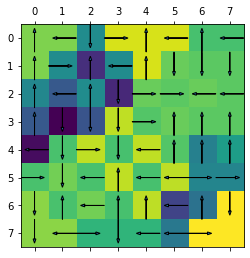

In [33]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0.1)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 0.5$

[[-0.26526163 -0.26526163 -0.64337482 -0.08454495 -0.08454495 -0.08454495
  -0.39575381 -0.39575381]
 [-0.26526163 -0.52593794 -0.93512846 -0.64337482 -0.08454495 -0.32114544
  -0.33398881 -0.33942526]
 [-0.52593794 -0.7678963  -0.792474   -0.76747337 -0.32114544 -0.33398881
  -0.32114544 -0.33398881]
 [-0.7678963  -0.91326601 -0.65828597 -0.20821192 -0.34690382 -0.32114544
  -0.33398881 -0.33942526]
 [-0.91326601 -0.35438843 -0.20821192 -0.31726296 -0.20821192 -0.34690382
  -0.57453634 -0.48583361]
 [-0.35438843 -0.30529614 -0.31726296 -0.20821192 -0.31726296 -0.21286149
  -0.71117219 -0.67679358]
 [-0.2379521  -0.35438843 -0.30529614 -0.31726296 -0.21286149 -0.70167573
  -0.71989879  0.        ]
 [-0.2379521  -0.2379521  -0.46971735 -0.46971735 -0.46971735 -0.66458261
   0.          0.        ]]
[[0 3 1 1 0 3 0 3]
 [0 3 3 0 0 2 2 2]
 [0 3 0 2 1 1 3 3]
 [0 2 2 2 1 0 0 0]
 [1 2 1 2 3 0 0 0]
 [1 1 1 0 3 3 1 0]
 [2 0 0 0 0 3 2 2]
 [2 3 1 2 3 3 1 0]]


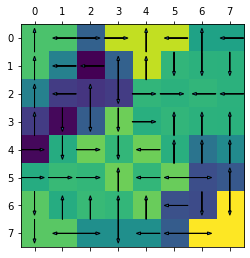

In [34]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0.5)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 0.75$

[[-0.53051696 -0.53051696 -0.72791777 -0.1690879  -0.1690879  -0.1690879
  -0.7504569  -0.76072382]
 [-0.53051696 -0.79119328 -1.16187148 -0.72791777 -0.1690879  -0.64962211
  -0.66063084 -0.66790193]
 [-0.79119328 -1.09832072 -1.19631563 -1.02241577 -0.64962211 -0.66063084
  -0.64962211 -0.66063084]
 [-1.09832072 -1.21127068 -0.91322837 -0.47873193 -0.67354585 -0.64962211
  -0.66063084 -0.66790193]
 [-1.21127068 -0.63360189 -0.47873193 -0.57220536 -0.47873193 -0.67354585
  -0.90301301 -0.8170456 ]
 [-0.63360189 -0.57581615 -0.57220536 -0.47873193 -0.57220536 -0.4833815
  -1.01160256 -0.85176327]
 [-0.47589856 -0.63360189 -0.57581615 -0.57220536 -0.4833815  -0.95778053
  -0.71989879  0.        ]
 [-0.47589856 -0.47589856 -0.93942355 -0.93942355 -0.93942355 -0.71989879
   0.          0.        ]]
[[0 3 1 1 0 3 3 3]
 [0 3 0 0 0 2 2 2]
 [0 3 0 2 1 1 3 3]
 [0 2 2 2 1 0 0 0]
 [1 2 1 2 3 0 0 0]
 [1 1 1 0 3 3 1 2]
 [2 0 0 0 0 3 2 2]
 [2 3 1 2 3 1 1 0]]


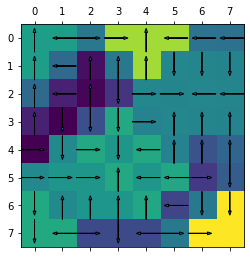

In [35]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0.75)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 1$


[[-5.53837822 -4.59272034 -3.9767854  -3.37568177 -3.333408   -2.70976524
  -2.95743713 -2.91899028]
 [-5.48762664 -4.81546311 -4.49054929 -3.67453104 -2.70976524 -2.4745644
  -2.32040808 -2.14698728]
 [-5.41811134 -4.51357149 -4.08194176 -3.33202251 -2.4745644  -2.32040808
  -2.14698728 -1.97455113]
 [-4.46991549 -3.81067726 -3.3299544  -2.77577287 -2.56843416 -2.38209836
  -1.97455113 -1.65842545]
 [-3.81067726 -3.07459897 -2.77577287 -2.72618593 -2.51302741 -2.30513814
  -1.65666059 -1.22454338]
 [-3.07459897 -2.87285709 -2.72618593 -2.51302741 -2.4587909  -1.65666059
  -1.22454338 -0.85176327]
 [-3.21344967 -3.07459897 -2.87285709 -2.11167898 -1.87681314 -1.37040799
  -0.71989879  0.        ]
 [-3.58562649 -2.98463641 -2.11167898 -1.87681314 -1.44708204 -0.71989879
   0.          0.        ]]
[[1 1 1 1 1 2 2 2]
 [1 1 1 1 1 2 2 2]
 [2 2 1 1 1 1 1 2]
 [2 2 2 2 1 1 1 2]
 [1 2 1 2 2 1 2 2]
 [1 1 1 1 1 1 1 2]
 [1 0 0 2 2 1 2 2]
 [0 1 1 1 1 1 1 0]]


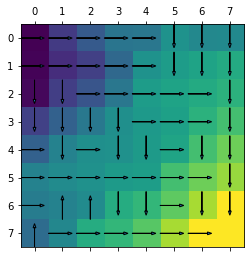

In [39]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(1)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

# Policy Iteration

### $\gamma = 0$

[[-0.13263486 -0.13263486 -0.32491382 -0.04227377 -0.04227377 -0.04227377
  -0.19788294 -0.19788294]
 [-0.13263486 -0.32491382 -0.61593495 -0.32491382 -0.04227377 -0.15415632
  -0.1734208  -0.17243615]
 [-0.39331117 -0.50493138 -0.32491382 -0.66336892 -0.15415632 -0.1734208
  -0.15415632 -0.17243615]
 [-0.50493138 -0.7360783  -0.55418153 -0.04958694 -0.18633581 -0.15415632
  -0.1734208  -0.17243615]
 [-0.65923822 -0.20174187 -0.04958694 -0.21315851 -0.04958694 -0.18633581
  -0.40754722 -0.31612568]
 [-0.20174187 -0.1388507  -0.20174187 -0.04958694 -0.21315851 -0.05423651
  -0.37278011 -0.37278011]
 [-0.11897968 -0.20174187 -0.1388507  -0.21315851 -0.05423651 -0.5952465
  -0.43211721  0.        ]
 [-0.11897968 -0.11897968 -0.23486584 -0.23486584 -0.23486584 -0.42973111
   0.          0.        ]]
[[0 3 2 1 0 3 0 3]
 [0 1 0 3 0 2 2 2]
 [0 3 0 2 1 1 3 1]
 [0 2 2 2 1 0 0 0]
 [3 2 1 2 3 0 0 0]
 [1 2 3 0 3 3 1 1]
 [2 0 3 0 0 3 0 2]
 [2 3 1 2 3 3 1 0]]


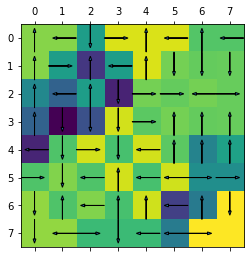

In [42]:
agent_2.clear()
agent_2.set_gamma(0)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 0.1$


[[-0.14737059 -0.14737059 -0.39040487 -0.04697038 -0.04697038 -0.04697038
  -0.21986774 -0.21986774]
 [-0.14737059 -0.39040487 -0.65497218 -0.39040487 -0.04697038 -0.1732288
  -0.19074213 -0.19150863]
 [-0.40804691 -0.54573474 -0.39040487 -0.67053011 -0.1732288  -0.19074213
  -0.1732288  -0.19074213]
 [-0.54573474 -0.75785662 -0.56134271 -0.07161678 -0.20365715 -0.1732288
  -0.19074213 -0.19150863]
 [-0.73247959 -0.21780339 -0.07161678 -0.22031969 -0.07161678 -0.20365715
  -0.4266197  -0.335275  ]
 [-0.21780339 -0.16062902 -0.21780339 -0.07161678 -0.22031969 -0.07626635
  -0.41419598 -0.41419598]
 [-0.13219832 -0.21780339 -0.16062902 -0.22031969 -0.07626635 -0.60287264
  -0.47353308  0.        ]
 [-0.13219832 -0.13219832 -0.26095944 -0.26095944 -0.26095944 -0.4558247
   0.          0.        ]]
[[0 3 2 1 0 3 0 3]
 [0 1 0 3 0 2 2 2]
 [0 3 0 2 1 1 3 3]
 [0 2 2 2 1 0 0 0]
 [3 2 1 2 3 0 0 0]
 [1 2 3 0 3 3 1 1]
 [2 0 3 0 0 3 0 2]
 [2 3 1 2 3 3 1 0]]


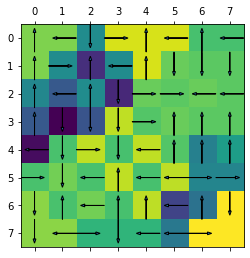

In [44]:
agent_2.clear()
agent_2.set_gamma(0.1)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 0.5$

[[-0.26526163 -0.26526163 -0.64337482 -0.08454495 -0.08454495 -0.08454495
  -0.39575381 -0.39575381]
 [-0.26526163 -0.52593794 -0.93512846 -0.64337482 -0.08454495 -0.32114544
  -0.33398881 -0.33942526]
 [-0.52593794 -0.7678963  -0.792474   -0.76747337 -0.32114544 -0.33398881
  -0.32114544 -0.33398881]
 [-0.7678963  -0.91326601 -0.65828597 -0.20821192 -0.34690382 -0.32114544
  -0.33398881 -0.33942526]
 [-0.91326601 -0.35438843 -0.20821192 -0.31726296 -0.20821192 -0.34690382
  -0.57453634 -0.48583361]
 [-0.35438843 -0.30529614 -0.31726296 -0.20821192 -0.31726296 -0.21286149
  -0.71117219 -0.67679358]
 [-0.2379521  -0.35438843 -0.30529614 -0.31726296 -0.21286149 -0.70167573
  -0.71989879  0.        ]
 [-0.2379521  -0.2379521  -0.46971735 -0.46971735 -0.46971735 -0.66458261
   0.          0.        ]]
[[0 3 1 1 0 3 0 3]
 [0 3 3 0 0 2 2 2]
 [0 3 0 2 1 1 3 3]
 [0 2 2 2 1 0 0 0]
 [1 2 1 2 3 0 0 0]
 [1 1 1 0 3 3 1 0]
 [2 0 0 0 0 3 2 2]
 [2 3 1 2 3 3 1 0]]


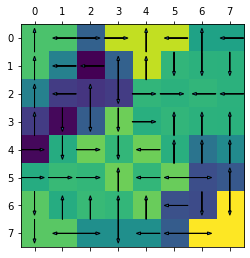

In [45]:
agent_2.clear()
agent_2.set_gamma(0.5)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 0.75$

[[-0.53051696 -0.53051696 -0.72791777 -0.1690879  -0.1690879  -0.1690879
  -0.7504569  -0.76072382]
 [-0.53051696 -0.79119328 -1.16187148 -0.72791777 -0.1690879  -0.64962211
  -0.66063084 -0.66790193]
 [-0.79119328 -1.09832072 -1.19631563 -1.02241577 -0.64962211 -0.66063084
  -0.64962211 -0.66063084]
 [-1.09832072 -1.21127068 -0.91322837 -0.47873193 -0.67354585 -0.64962211
  -0.66063084 -0.66790193]
 [-1.21127068 -0.63360189 -0.47873193 -0.57220536 -0.47873193 -0.67354585
  -0.90301301 -0.8170456 ]
 [-0.63360189 -0.57581615 -0.57220536 -0.47873193 -0.57220536 -0.4833815
  -1.01160256 -0.85176327]
 [-0.47589856 -0.63360189 -0.57581615 -0.57220536 -0.4833815  -0.95778053
  -0.71989879  0.        ]
 [-0.47589856 -0.47589856 -0.93942355 -0.93942355 -0.93942355 -0.71989879
   0.          0.        ]]
[[0 3 1 1 0 3 3 3]
 [0 3 0 0 0 2 2 2]
 [0 3 0 2 1 1 3 3]
 [0 2 2 2 1 0 0 0]
 [1 2 1 2 3 0 0 0]
 [1 1 1 0 3 3 1 2]
 [2 0 0 0 0 3 2 2]
 [2 3 1 2 3 1 1 0]]


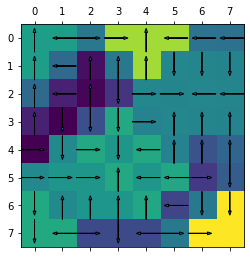

In [46]:
agent_2.clear()
agent_2.set_gamma(0.75)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 1$

[[-5.53837822 -4.59272034 -3.9767854  -3.37568177 -3.333408   -2.70976524
  -2.95743713 -2.91899028]
 [-5.48762664 -4.81546311 -4.49054929 -3.67453104 -2.70976524 -2.4745644
  -2.32040808 -2.14698728]
 [-5.41811134 -4.51357149 -4.08194176 -3.33202251 -2.4745644  -2.32040808
  -2.14698728 -1.97455113]
 [-4.46991549 -3.81067726 -3.3299544  -2.77577287 -2.56843416 -2.38209836
  -1.97455113 -1.65842545]
 [-3.81067726 -3.07459897 -2.77577287 -2.72618593 -2.51302741 -2.30513814
  -1.65666059 -1.22454338]
 [-3.07459897 -2.87285709 -2.72618593 -2.51302741 -2.4587909  -1.65666059
  -1.22454338 -0.85176327]
 [-3.21344967 -3.07459897 -2.87285709 -2.11167898 -1.87681314 -1.37040799
  -0.71989879  0.        ]
 [-3.58562649 -2.98463641 -2.11167898 -1.87681314 -1.44708204 -0.71989879
   0.          0.        ]]
[[1 1 1 1 1 2 2 2]
 [1 1 1 1 1 2 2 2]
 [2 2 1 1 1 1 1 2]
 [2 2 2 2 1 1 1 2]
 [1 2 1 2 2 1 2 2]
 [1 1 1 1 1 1 1 2]
 [1 0 0 2 2 1 2 2]
 [0 1 1 1 1 1 1 0]]


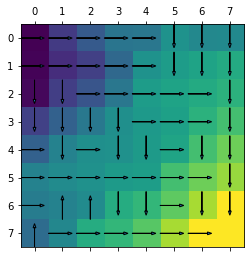

In [47]:
agent_2.clear()
agent_2.set_gamma(1)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)